
Number of clusters = 9
Silhouette score = 0.4503114980086527

Optimal number of clusters = 2


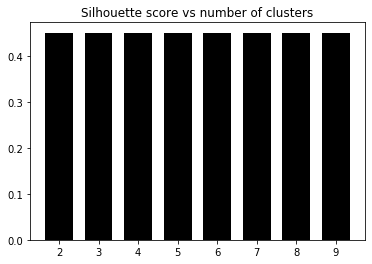

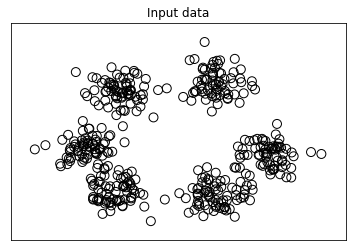

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

# Load data from input file
X = np.loadtxt('data_quality.txt', delimiter=',')


# Initialize the variables. The values array will contain a list of values we want to iterate on
# and find the optimal number of clusters:
# Initialize variables
scores = []
values = np.arange(2, 10)

# Iterate through all the values and build a K-Means model during each iteration:
# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)

# Estimate the silhouette score for the current clustering model using Euclidean distance metric:
score = metrics.silhouette_score(X, kmeans.labels_,metric='euclidean', sample_size=len(X))

# Print the silhouette score for the current value:
print("\nNumber of clusters =", num_clusters)
print("Silhouette score =", score)
scores.append(score)

# Visualize the silhouette scores for various values:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')


# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

# Visualize input data:
# Plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o',facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()